In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [20]:
nb_2016 = pd.read_csv('neighbourhood-profiles-2016-csv.csv')
nb_2016.head(3)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"


In [21]:
nb_2016.columns.values

array(['_id', 'Category', 'Topic', 'Data Source', 'Characteristic',
       'City of Toronto', 'Agincourt North',
       'Agincourt South-Malvern West', 'Alderwood', 'Annex',
       'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor',
       'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown',
       'Beechborough-Greenbrook', 'Bendale', 'Birchcliffe-Cliffside',
       'Black Creek', 'Blake-Jones', 'Briar Hill-Belgravia',
       'Bridle Path-Sunnybrook-York Mills', 'Broadview North',
       'Brookhaven-Amesbury', 'Cabbagetown-South St. James Town',
       'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough',
       'Church-Yonge Corridor', 'Clairlea-Birchmount', 'Clanton Park',
       'Cliffcrest', 'Corso Italia-Davenport', 'Danforth',
       'Danforth East York', 'Don Valley Village', 'Dorset Park',
       'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB',
       'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley',
       'Eglint

### Create new tables for each Category with name of 'nb2016_ _Category_'

In [23]:
tableName = []
for i in nb_2016['Category'].unique():
    j = i.title().replace(', ', '').replace(' ', '')
    tableName.append('nb2016_' + j)
    globals()['nb2016_' + j] = nb_2016[nb_2016['Category'] == i]
tableName

['nb2016_NeighbourhoodInformation',
 'nb2016_Population',
 'nb2016_FamiliesHouseholdsAndMaritalStatus',
 'nb2016_Language',
 'nb2016_Income',
 'nb2016_ImmigrationAndCitizenship',
 'nb2016_VisibleMinority',
 'nb2016_EthnicOrigin',
 'nb2016_AboriginalPeoples',
 'nb2016_Education',
 'nb2016_Housing',
 'nb2016_LanguageOfWork',
 'nb2016_Labour',
 'nb2016_JourneyToWork',
 'nb2016_Mobility']

### Create subset of Population

In [24]:
print(nb2016_Population['Topic'].unique())

['Population and dwellings' 'Age characteristics']


In [25]:
nb2016Age = nb2016_Population[nb2016_Population['Topic'] == 'Age characteristics'].iloc[:, 4:]

In [26]:
# Convert string to int
for i in nb2016Age.iloc[:, 1:].columns:
    nb2016Age[i] = nb2016Age[i].str.replace(',', '').astype('int')

### Analyze with age segments

In [27]:
nb2016AgeSeg = nb2016Age[:6]

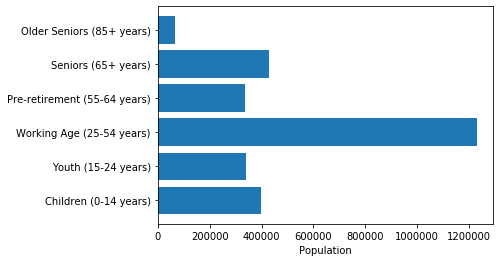

In [28]:
# Plot horizontal bar by age segments
plt.barh(nb2016AgeSeg['Characteristic'], nb2016AgeSeg['City of Toronto'])
plt.xlabel('Population')
plt.show()

### Analyze with age and gender segments

In [29]:
nb2016AgeGender = nb2016Age[6:]
nb2016AgeGender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 15 to 56
Columns: 142 entries, Characteristic to Yorkdale-Glen Park
dtypes: int32(141), object(1)
memory usage: 23.8+ KB


In [30]:
nb2016Female = nb2016AgeGender[nb2016AgeGender['Characteristic'].str.find('Female') == 0]

In [31]:
nb2016Male = nb2016AgeGender[nb2016AgeGender['Characteristic'].str.find('Female') == -1]

In [37]:
nb2016Female['Age'] = nb2016Female['Characteristic'].str[8:]
nb2016Male['Age'] = nb2016Male['Characteristic'].str[6:]

In [33]:
nb2016FM = pd.merge(nb2016Female, nb2016Male, how='inner', on='Age', suffixes=('_f', '_m'))
nb2016FM['Ages'] = nb2016FM['Age'].str.split().str.get(0).astype('int')

In [34]:
nb2016FM = nb2016FM.sort_values(['Ages'])

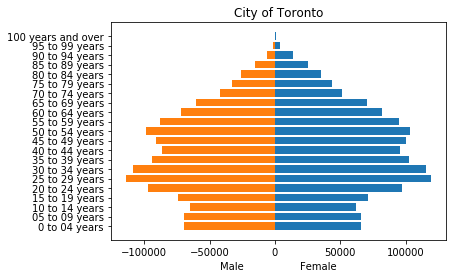

In [35]:
X = nb2016FM['Age']
plt.barh(X, nb2016FM['City of Toronto_f'])
plt.barh(X, -nb2016FM['City of Toronto_m'])
plt.title('City of Toronto')
plt.xlabel('Male                  Female')
plt.show()

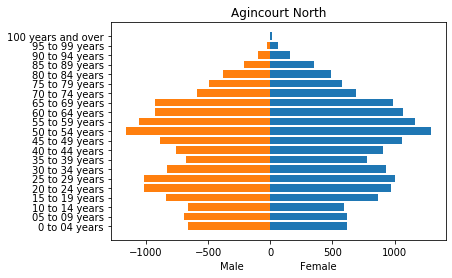

In [36]:
X = nb2016FM['Age']
plt.barh(X, nb2016FM['Agincourt North_f'])
plt.barh(X, -nb2016FM['Agincourt North_m'])
plt.title('Agincourt North')
plt.xlabel('Male                  Female')
plt.show()